### Task 2: Market Segmentation Analysis

# Fast Food 

###  Problem Statement

McDonald’s, as part of a market segmentation analysis using a different empirical dataset, aims to explore the existence of distinct consumer segments with varying perceptions of the brand. The objective is to identify systematic differences in brand perceptions among market segments to inform targeted marketing strategies

### Importing libraries

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.mosaicplot as smosaic

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import plot_tree



### Data Gathering

In [179]:
df = pd.read_csv('C:/Users/Lenovo/Downloads/mcdonalds.csv')

In [180]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


### Exploratory Data Analysis

In [181]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [182]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [183]:
df.shape

(1453, 15)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [185]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

<AxesSubplot: >

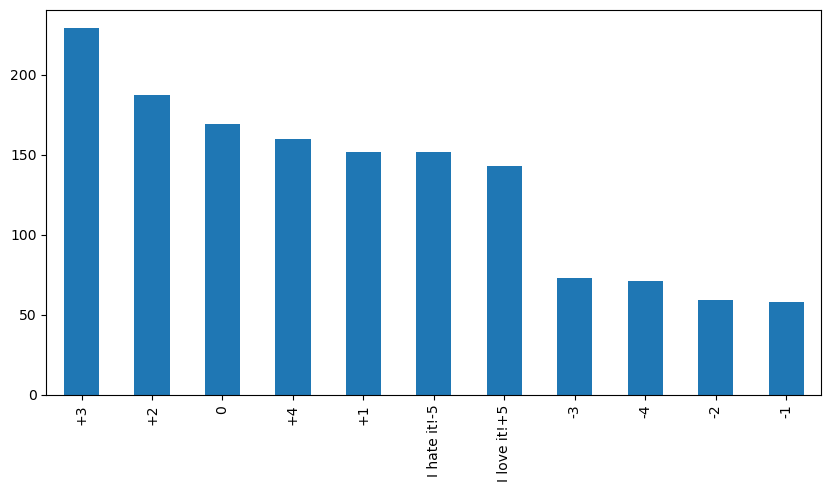

In [186]:
df['Like'].value_counts().plot(kind = 'bar')

In [187]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

<AxesSubplot: >

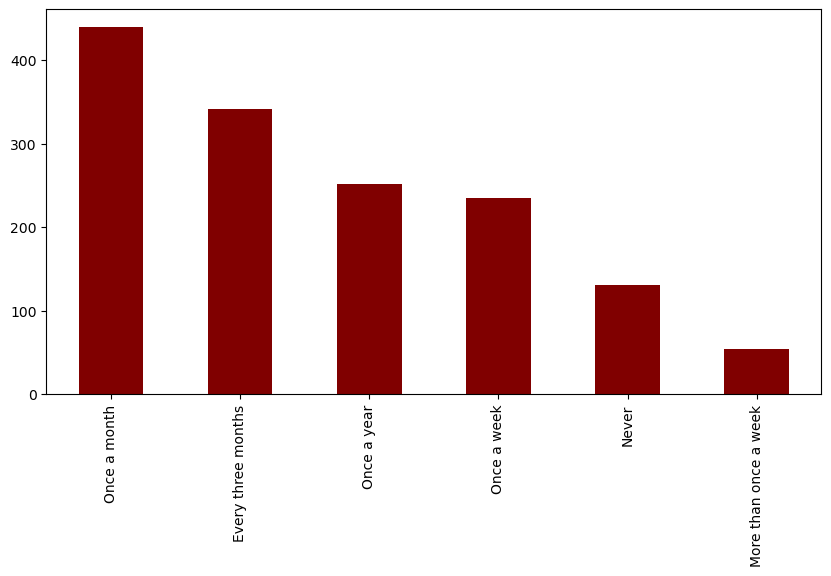

In [195]:
df['VisitFrequency'].value_counts().plot(kind = 'bar',color='maroon')

In [189]:
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

<AxesSubplot: ylabel='Gender'>

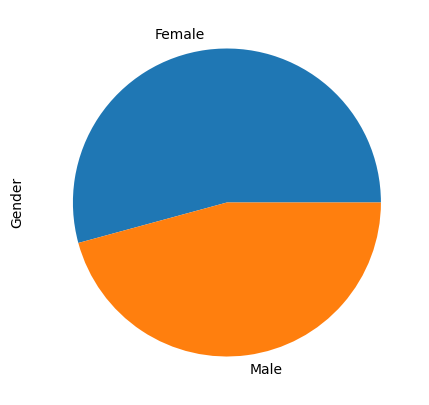

In [190]:
df['Gender'].value_counts().plot(kind = 'pie')

In [130]:
df1 = df.drop(['Like','Age','VisitFrequency','Gender'],axis=1)
df1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [131]:
df1.shape

(1453, 11)

In [132]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   yummy       1453 non-null   object
 1   convenient  1453 non-null   object
 2   spicy       1453 non-null   object
 3   fattening   1453 non-null   object
 4   greasy      1453 non-null   object
 5   fast        1453 non-null   object
 6   cheap       1453 non-null   object
 7   tasty       1453 non-null   object
 8   expensive   1453 non-null   object
 9   healthy     1453 non-null   object
 10  disgusting  1453 non-null   object
dtypes: object(11)
memory usage: 125.0+ KB


#### Label Encoding

In [133]:
df1_encode = df1.apply(LabelEncoder().fit_transform)
df1_encode

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [134]:
df_x = df1.iloc[:,0:11].copy()
df_x = (df_x == 'Yes').astype(int)
result = df_x.mean().round(2)
print(result)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


### Principal Component Analysis

In [135]:
pca_data = preprocessing.scale(df1_encode)
pca = PCA(n_components = 11)
df_pca = pca.fit_transform(pca_data)
names = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
summary = pd.DataFrame(data = df_pca, columns = names)

Standard_deviation = pca.explained_variance_
Proportion_of_variance = pca.explained_variance_ratio_
Cumulative_Proportion = np.cumsum(pca.explained_variance_ratio_)

print('Standard deviation:\n',Standard_deviation)
print('Proportion of variance:\n', Proportion_of_variance)
print('Cumulative Proportion:\n', Cumulative_Proportion)

Standard deviation:
 [2.81316617 1.6329477  1.38111047 1.08171127 0.91895162 0.78253978
 0.71533376 0.59270042 0.52426978 0.3078135  0.25703129]
Proportion of variance:
 [0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]
Cumulative Proportion:
 [0.25556637 0.40391399 0.52938308 0.62765279 0.71113635 0.78222737
 0.84721295 0.90105773 0.94868581 0.9766496  1.        ]


In [136]:
summary.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


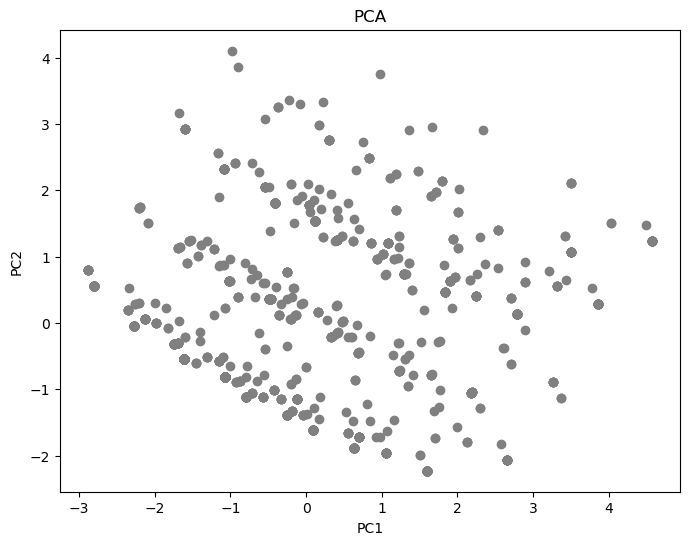

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='grey')
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [138]:
pca = PCA()
pca.fit(df1_encode)

pca_loadings = pca.components_
num_pc = pca.n_features_
pc_list = ['PC'+str(i) for i in list(range(1, num_pc + 1))]

loadings_df = pd.DataFrame(pca_loadings.T, columns=pc_list, index=df1_encode.columns)
print(loadings_df)

                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519  0.013041  0.572403 -0.1102

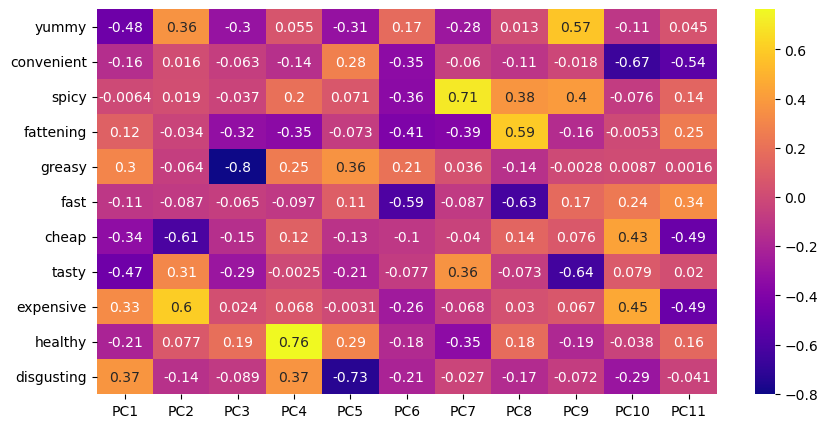

In [139]:
plt.rcParams['figure.figsize'] = (10,5)
ax = sns.heatmap(loadings_df, annot = True, cmap = 'plasma')
plt.show()

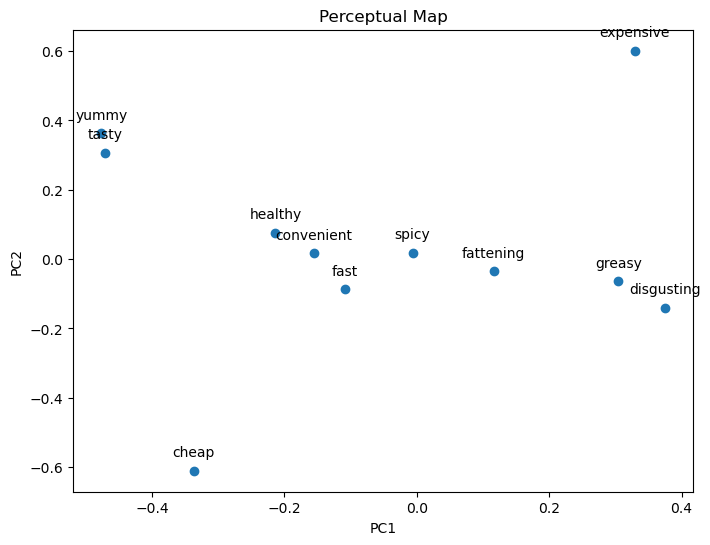

In [140]:
pc1 = 'PC1'
pc2 = 'PC2'

plt.figure(figsize=(8, 6))
plt.scatter(loadings_df[pc1], loadings_df[pc2])

for feature, row in loadings_df.iterrows():
    plt.annotate(feature, (row[pc1], row[pc2]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel(pc1)
plt.ylabel(pc2)
plt.title('Perceptual Map')


plt.show()

In [141]:
!pip install bioinfokit


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


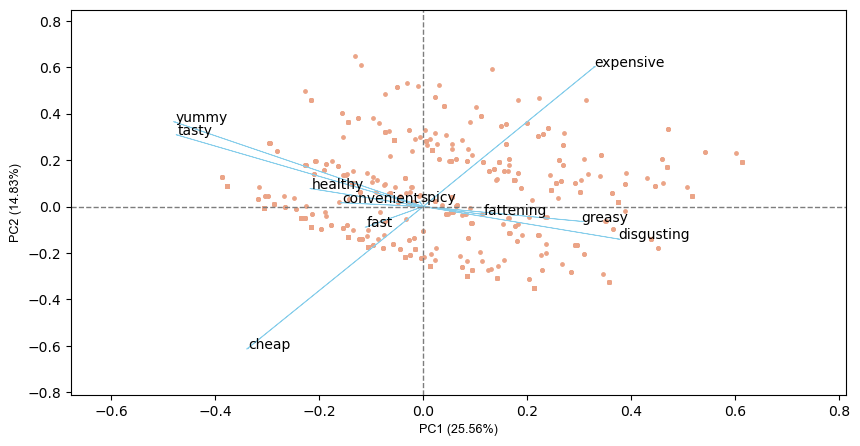

In [142]:
pca_score = PCA().fit_transform(pca_data)
cluster.biplot(cscore = pca_score, loadings = pca_loadings, labels = df1_encode.columns.values,
               var1 = round(Proportion_of_variance[0]*100,2),
               var2 = round(Proportion_of_variance[1]*100,2),show = True, dim = (10,5))

### Exploring Segments

### K-Means Clustering

In [143]:
np.random.seed(1453)

n_clusters_range = range(2, 9)

clusterings = {}
silhouette_scores = {}  

for n_clusters in n_clusters_range:
    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1453)
    cluster_labels = kmeans.fit_predict(df_pca)
    
    clusterings[n_clusters] = cluster_labels
    
    # silhouette score
    silhouette_scores[n_clusters] = silhouette_score(df_pca, cluster_labels)

for n_clusters, silhouette_score_val in silhouette_scores.items():
    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {silhouette_score_val:.2f}")

# Choose the number of clusters with the highest silhouette score
best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)

Number of Clusters: 2, Silhouette Score: 0.22
Number of Clusters: 3, Silhouette Score: 0.23
Number of Clusters: 4, Silhouette Score: 0.23
Number of Clusters: 5, Silhouette Score: 0.23
Number of Clusters: 6, Silhouette Score: 0.25
Number of Clusters: 7, Silhouette Score: 0.26
Number of Clusters: 8, Silhouette Score: 0.28


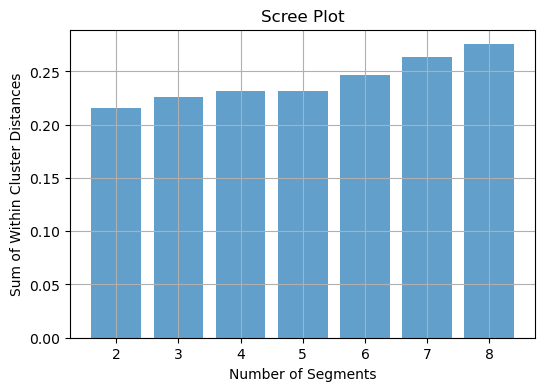

In [151]:
n_clusters_range = list(silhouette_scores.keys())
silhouette_scores_values = list(silhouette_scores.values())

plt.figure(figsize=(6, 4))
plt.bar(n_clusters_range, silhouette_scores_values, align='center', alpha=0.7)
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within Cluster Distances')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [152]:
np.random.seed(1453)

X = df1_encode.iloc[:, :2].values

n_clusters_range = range(2, 9)
n_replicates = 10
n_bootstrap_samples = 100

cluster_labels_dict = {}
stability_scores = {}

# bootstrap clustering
for n_clusters in n_clusters_range:
    cluster_labels_bootstrap = []
    for _ in range(n_bootstrap_samples):
        # Create a bootstrap sample
        X_bootstrap = resample(X, replace=True, random_state=np.random.randint(1000))
        
        # Fit K-means clustering on the bootstrap sample
        kmeans = KMeans(n_clusters=n_clusters, random_state=np.random.randint(1000))
        cluster_labels = kmeans.fit_predict(X_bootstrap)
        
        # Store cluster labels for each bootstrap iteration
        cluster_labels_bootstrap.append(cluster_labels)
    

    cluster_labels_dict[n_clusters] = cluster_labels_bootstrap
    
    # stability score
    stability_score = np.mean(np.std(cluster_labels_bootstrap, axis=0))
    stability_scores[n_clusters] = stability_score

# stability scores for each number of clusters
for n_clusters, stability_score in stability_scores.items():
    print(f"Number of Clusters: {n_clusters}, Stability Score: {stability_score:.2f}")

Number of Clusters: 2, Stability Score: 0.50
Number of Clusters: 3, Stability Score: 0.71
Number of Clusters: 4, Stability Score: 0.72
Number of Clusters: 5, Stability Score: 1.38
Number of Clusters: 6, Stability Score: 1.76
Number of Clusters: 7, Stability Score: 1.95
Number of Clusters: 8, Stability Score: 2.08


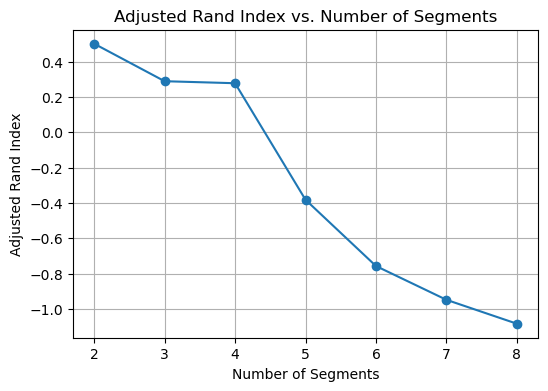

In [153]:
n_clusters_range = list(stability_scores.keys())
adjusted_rand_index_values = [1 - stability_scores[n_clusters] for n_clusters in n_clusters_range]

plt.figure(figsize=(6, 4))
plt.plot(n_clusters_range, adjusted_rand_index_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index vs. Number of Segments')
plt.grid(True)
plt.show()

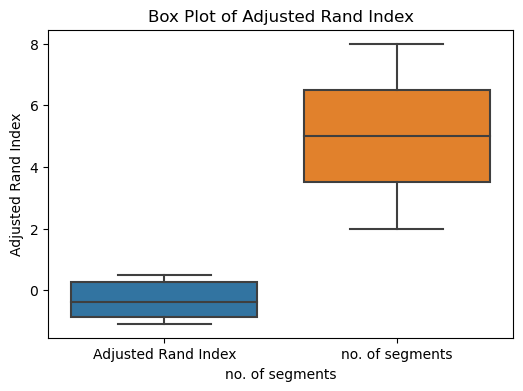

In [154]:
n_clusters_range = list(stability_scores.keys())
adjusted_rand_index_values = [1 - stability_scores[n_clusters] for n_clusters in n_clusters_range]

data_for_boxplot = {'Adjusted Rand Index': adjusted_rand_index_values, 'no. of segments':n_clusters_range}
df_boxplot = pd.DataFrame(data_for_boxplot)

plt.figure(figsize=(6, 4))
sns.boxplot(data=df_boxplot)
plt.ylabel('Adjusted Rand Index')
plt.xlabel('no. of segments')
plt.title('Box Plot of Adjusted Rand Index')
plt.show()

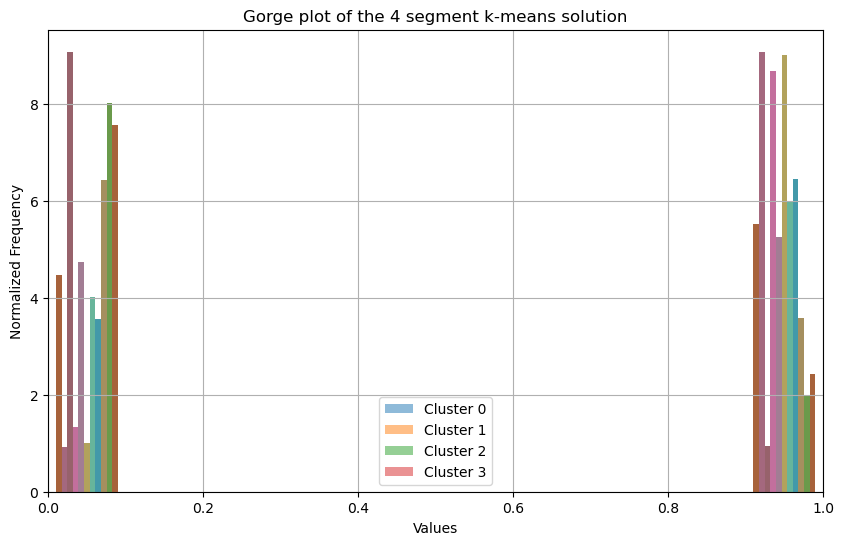

In [155]:
cluster_labels = np.random.randint(0,4, size=100)

MD_x_cluster1 = df1_encode.iloc[:].values
MD_x_cluster2 = df1_encode.iloc[:].values
MD_x_cluster3 = df1_encode.iloc[:].values
MD_x_cluster4 = df1_encode.iloc[:].values

cluster_data = [MD_x_cluster1, MD_x_cluster2, MD_x_cluster3, MD_x_cluster4]

plt.figure(figsize=(10, 6))
for i in range(4):  # Iterate through each cluster
    plt.hist(cluster_data[i], bins=10, range=(0, 1), alpha=0.5, label=f'Cluster {i}', density=True)

plt.xlabel('Values')
plt.ylabel('Normalized Frequency')
plt.title('Gorge plot of the 4 segment k-means solution')
plt.xlim(0, 1)  
plt.legend()
plt.grid(True)
plt.show()

In [156]:
MD_kmeans = {
    "1": [1, 2, 3],
    "2": [4, 5, 6],
    "3": [7, 8, 9],
    "4": [10, 11, 12]
}

# Extracting data for the 4th cluster (total 4 clusters)
MD_k4 = MD_kmeans["4"]

print(MD_k4)

[10, 11, 12]


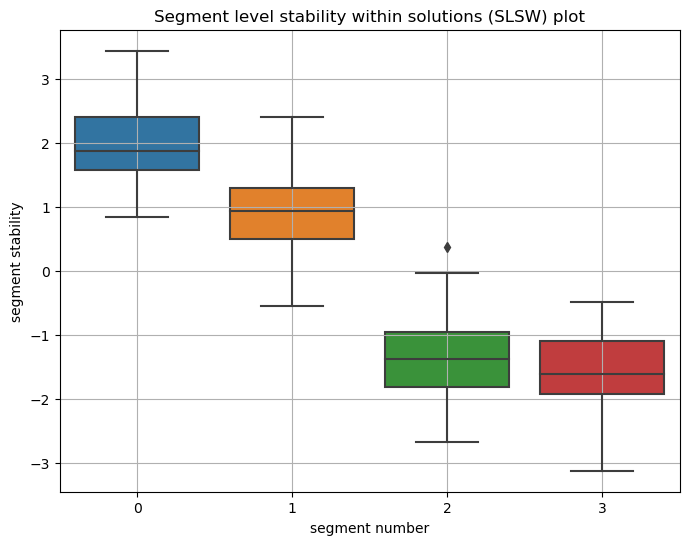

In [157]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels = kmeans.fit_predict(X)

df_clustered = pd.DataFrame(data=X, columns=['Feature 1', 'Feature 2'])
df_clustered['Cluster'] = cluster_labels

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clustered, x='Cluster', y='Feature 1')
plt.xlabel('segment number')
plt.ylabel('segment stability')
plt.title('Segment level stability within solutions (SLSW) plot')
plt.grid(True)
plt.show()

### Mixtures of Distributions

In [158]:
results = []

np.random.seed(1234)

for k in range(2, 9):
    # Initialize a Gaussian Mixture Model with 'k' clusters
    gmm = GaussianMixture(n_components=k, random_state=1234)
    
    # Fit the model to the data
    gmm.fit(df1_encode)
    
    # Store the model in the results list
    results.append((k, gmm))

# Print the results for each number of clusters
for k, gmm in results:
    print(f"Number of Clusters: {k}")
    print(gmm)

# Access specific information about the best model (e.g., cluster assignments)
best_model = results[0][1]  # Assuming the first model is the best
cluster_assignments = best_model.predict(df1_encode)
print("Cluster Assignments:")
print(cluster_assignments)

Number of Clusters: 2
GaussianMixture(n_components=2, random_state=1234)
Number of Clusters: 3
GaussianMixture(n_components=3, random_state=1234)
Number of Clusters: 4
GaussianMixture(n_components=4, random_state=1234)
Number of Clusters: 5
GaussianMixture(n_components=5, random_state=1234)
Number of Clusters: 6
GaussianMixture(n_components=6, random_state=1234)
Number of Clusters: 7
GaussianMixture(n_components=7, random_state=1234)
Number of Clusters: 8
GaussianMixture(n_components=8, random_state=1234)
Cluster Assignments:
[1 1 1 ... 1 1 0]


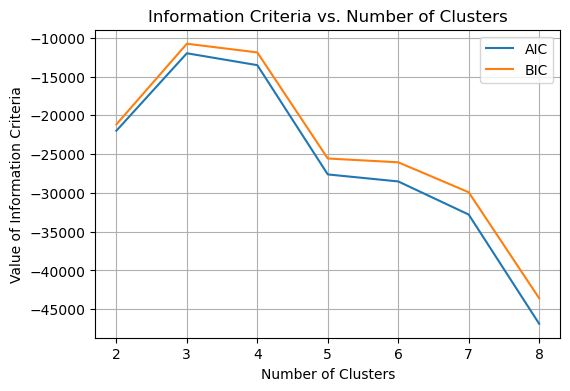

In [159]:
AIC_values = [gmm.aic(df1_encode) for _, gmm in results]
BIC_values = [gmm.bic(df1_encode) for _, gmm in results]

plt.figure(figsize=(6, 4))
plt.plot(range(2, 9), AIC_values, label='AIC')
plt.plot(range(2, 9), BIC_values, label='BIC')

plt.xlabel('Number of Clusters')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [160]:
X, _ = make_blobs(n_samples=1453, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels_kmeans = kmeans.fit_predict(X)

gmm = GaussianMixture(n_components=4, random_state=0)
cluster_labels_gmm = gmm.fit_predict(X)

df_clusters = pd.DataFrame({
    'KMeans Cluster': cluster_labels_kmeans,
    'GMM Cluster': cluster_labels_gmm
})

contingency_table = pd.crosstab(df_clusters['KMeans Cluster'], df_clusters['GMM Cluster'])

print(contingency_table)

GMM Cluster       0    1    2    3
KMeans Cluster                    
0                 0    0  359    3
1               363    0    0    0
2                 0  363    0    0
3                 0    0    0  365


In [161]:
MD_x = df1_encode

kmeans_clusters = [0, 1, 2,3]

# Gaussian Mixture Model (GMM) using K-means clusters as initialization
gmm_m4a = GaussianMixture(n_components=2, random_state=42, init_params='kmeans')
gmm_m4a.fit(MD_x, kmeans_clusters)

gmm_m4 = GaussianMixture(n_components=2, random_state=42, init_params='kmeans')
gmm_m4.fit(MD_x, kmeans_clusters)

# log-likelihood for each GMM model
loglik_m4a = gmm_m4a.score(MD_x)
loglik_m4 = gmm_m4.score(MD_x)

print("Log-Likelihood for MD.m4a:", loglik_m4a)
print("Log-Likelihood for MD.m4:", loglik_m4)

Log-Likelihood for MD.m4a: 3.4023510269581383
Log-Likelihood for MD.m4: 3.4023510269581383


### Mixtures of Regression Models

In [162]:
like_counts = df['Like'].value_counts()

reversed_counts = pd.DataFrame(like_counts).T

print(reversed_counts)

       +3   +2    0   +4   +1  I hate it!-5  I love it!+5  -3  -4  -2  -1
Like  229  187  169  160  152           152           143  73  71  59  58


In [163]:
df['Like.n'] = 6 - df['Like'].map({'Yes': 1, 'No': 0})

like_n_counts = df['Like.n'].value_counts()
print(like_n_counts)

Series([], Name: Like.n, dtype: int64)


In [164]:
col_names = "+".join(df.columns[:11])

formula_str = f'Like.n ~ {col_names}'

print(formula_str)

Like.n ~ yummy+convenient+spicy+fattening+greasy+fast+cheap+tasty+expensive+healthy+disgusting


### Profiling Segments

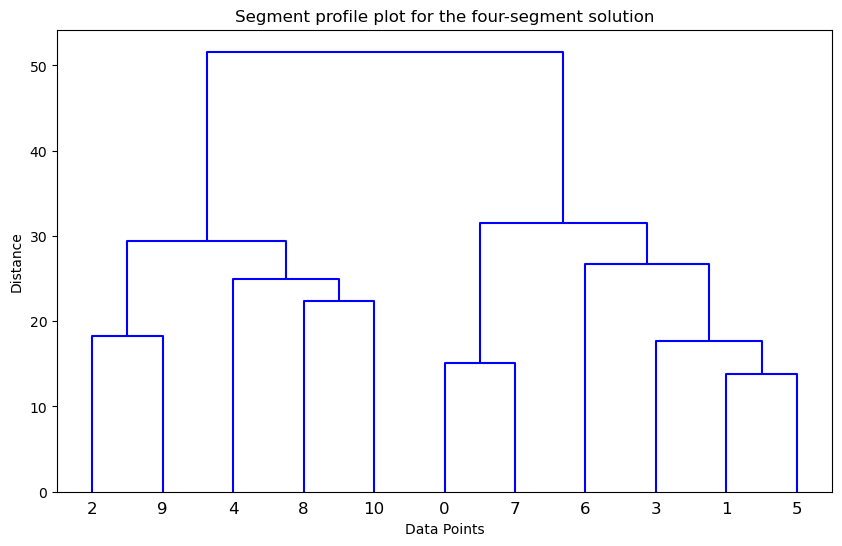

[0 1 2 1 3 1 1 0 3 2 3]


In [165]:
selected_columns = df1_encode[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']]

distances = pdist(selected_columns.T)  # Transpose the selected columns for feature-wise distance

# Perform hierarchical clustering
df_vclust = hierarchy.linkage(distances, method='ward')  # Using Ward's method for clustering

# Cut the dendrogram to obtain 4 clusters
clusters = hierarchy.cut_tree(df_vclust, n_clusters=4)

# Plot the dendrogram with clusters
plt.figure(figsize=(10, 6))
hierarchy.dendrogram(df_vclust, color_threshold=0, above_threshold_color='blue')
plt.title('Segment profile plot for the four-segment solution')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Print the cluster assignments
print(clusters.flatten())

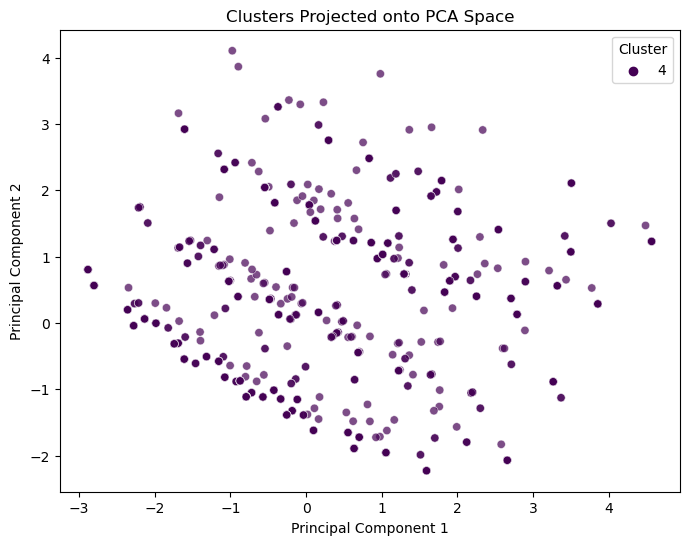

PCA(n_components=2)


In [166]:
pca = PCA(n_components=2)
clusters_n = 4

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters_n, palette='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Projected onto PCA Space')
plt.legend(title='Cluster')
plt.show()

print(pca)

### Describing Segments

In [167]:
kmeans_model = kmeans
k4_labels = kmeans_model.labels_

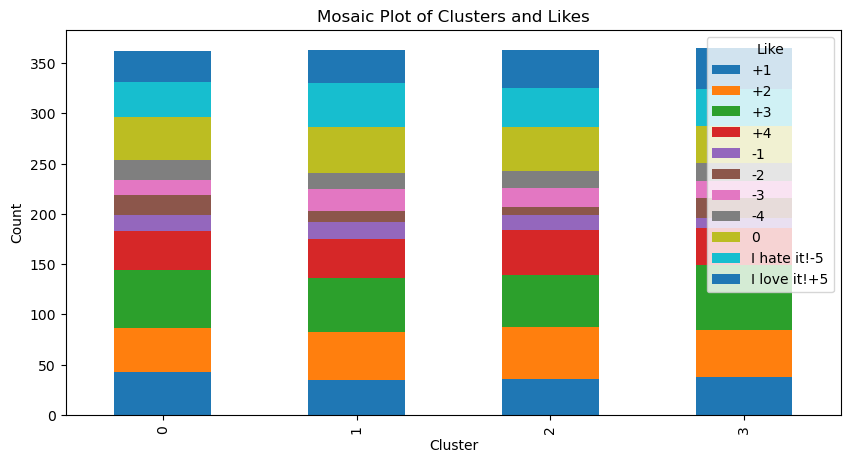

In [168]:
cluster_like_df = pd.DataFrame({'Cluster': k4_labels, 'Like': df['Like']})

crosstab = pd.crosstab(cluster_like_df['Cluster'], cluster_like_df['Like'])

crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Mosaic Plot of Clusters and Likes')
plt.legend(title='Like')
plt.show()

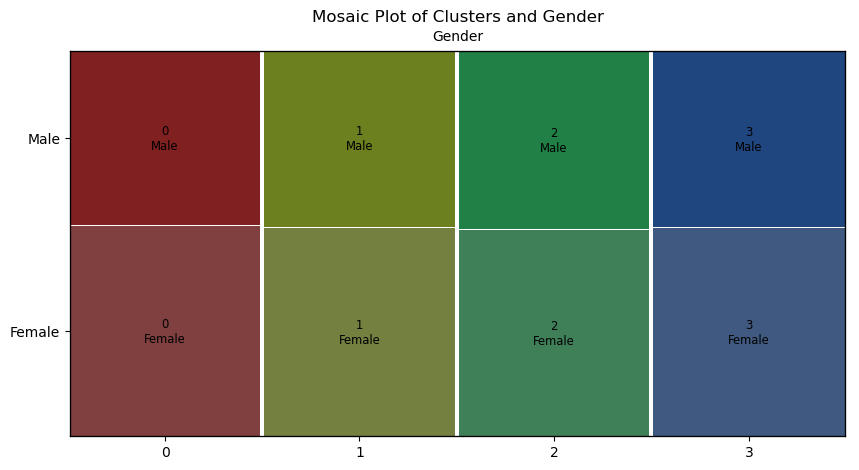

In [169]:
cluster_gender_df = pd.DataFrame({'Cluster': k4_labels, 'Gender': df['Gender']})

crosstab = pd.crosstab(cluster_gender_df['Cluster'], cluster_gender_df['Gender'])

fig, axes = plt.subplots()
smosaic.mosaic(crosstab.stack(), ax=axes)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Mosaic Plot of Clusters and Gender')
plt.show()

In [170]:
df['Like'] = df['Like'].replace({'I hate it!-5':'-5', 'I love it!+5':'+5'})
df['VisitFrequency'] = df['VisitFrequency'].replace({'Never':'0','Once a month':'1','Once a week':'2',
                                                    'Every three months':'3','Once a year':'4','More than once a week':'5'})
df['Gender'] = df['Gender'].replace({'Male':'0','Female':'1'})

X = df[['Like', 'Age', 'VisitFrequency', 'Gender']]  

kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

X_train, X_test, y_train, y_test = train_test_split(X, df['Cluster'], test_size=0.2, random_state=0)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


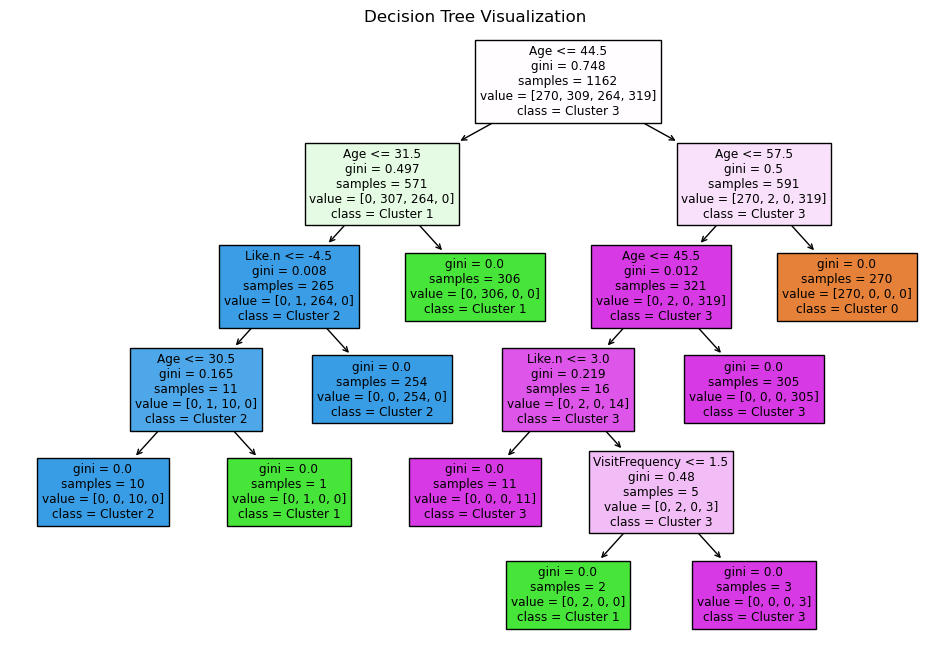

In [171]:
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=['Like.n', 'Age', 'VisitFrequency', 'Gender'], class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Decision Tree Visualization')
plt.show()

In [172]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])

visit_means = df.groupby(df['Cluster'])['VisitFrequency'].mean()

# Display the mean visit frequencies
print(visit_means)

Cluster
0    2.256716
1    2.080519
2    2.158537
3    2.340741
Name: VisitFrequency, dtype: float64


In [173]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])

like_means = mcdonalds.groupby(df['Cluster'])['Like.n'].mean()

print(like_means)

Cluster
0    4.5
1    6.0
2    5.0
3    5.5
Name: Like.n, dtype: float64


In [174]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

Gender_proportion = df['Gender'].groupby(df['Cluster']).mean()

print(Gender_proportion)

Cluster
0    0.546269
1    0.519481
2    0.524390
3    0.575309
Name: Gender, dtype: float64


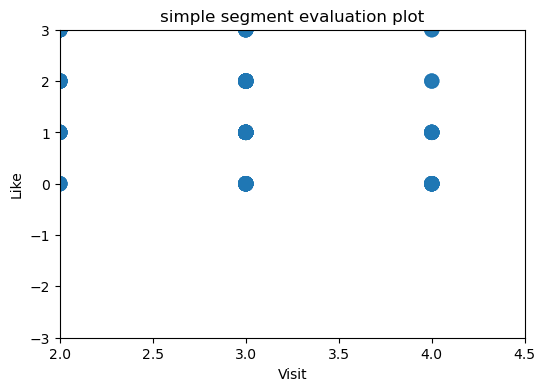

In [175]:
plt.figure(figsize=(6, 4))
plt.scatter(df['VisitFrequency'], df['Like'], s=100 * df['Gender'], alpha=0.7)
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.xlabel('Visit')
plt.ylabel('Like')
plt.title('simple segment evaluation plot')

plt.show()